# Regression
## Batch gradient descent

Ref used: 
> https://towardsdatascience.com/difference-between-batch-gradient-descent-and-stochastic-gradient-descent-1187f1291aa1
> https://stats.stackexchange.com/questions/117556/understanding-gaussian-basis-function-parameters-to-be-used-in-linear-regression
> https://stackoverflow.com/questions/22053050/difference-between-numpy-array-shape-r-1-and-r

In [146]:
import math
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA
from sklearn import cross_validation
import numpy as np
from sklearn.neural_network import MLPRegressor
%matplotlib inline 

Here we assume we are in D-dimensional space and have M data points, and we choose N basis functions. 
Actually now only 1-d version is implemented. 

In [186]:
X_li = []
t_li = []
text = open('regression_x_t.txt', 'r')
lines = text.readlines()
for line in lines:
    listOfLine = line.split(' ')
    X_li.append(float(listOfLine[0]))
    t_li.append(float(listOfLine[1]))
M = len(X_li)
D = 1

In [187]:
X = np.array(X_li)
t = np.array(t_li)

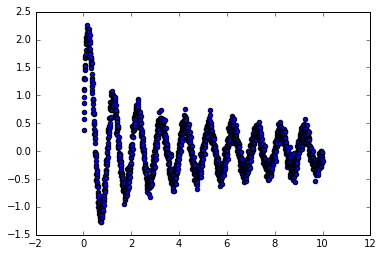

In [188]:
# Observe the data
plt.scatter(X, t)
plt.show()

Thus we choose Gaussian basis functions. For $N = 10$, $s = \frac{1}{N}$ and $\mu_j \in \{0, \dots, 9\}$ 

In [190]:
N = 30
s = 0.3
mu = np.array([0, 0.4, 0.7,1.1, 1.3,1.6, 1.9, 2.2,2.5, 2.9, 3.2,3.6, 3.9, 4.2,4.5, 4.9, 5.2,5.5, 5.9, 6.2, 6.6, 6.8,7.2, 7.4, 7.9, 8.2, 8.6, 8.8, 9.3, 9.9])
#mu=np.linspace(0,10,50)

Define basis function $\phi_j(x)$ for **scalar** x. Returns a scaler. For the case where x is a vector, $\mu_j$ is a vector as well. Here $(x-\mu_j)^2$ becomes 2-norm. 

In [191]:
def phi_j(x, j):
    phix = math.exp(-(x-mu[j])**2/(2*s**2))
    return phix

In [192]:
# vector version of phi
def phi(x):
    phix = np.exp(-1*np.subtract(x, mu)**2/(2*s**2))
    return phix

In [193]:
# matrix version of phi
def phi_mat(X):
    phi_mat = np.zeros((len(X), N))
    for i in range(len(X)):
        phi_mat[i, :] = phi(X[i])
    return phi_mat

Define predict function $y_i$. Takes a scalar data X[i] and returns a scalar. Namely, 
$$y_i(Xi,w)=\sum_{j=1}^N(\phi_j(Xi)\times w[j])=\phi(Xi)^Tw$$

In [194]:
def y_i(Xi, w):
    y = 0
    y = np.dot(phi(Xi), w)
    #for j in range(N):
    #    y = y + phi_j(Xi, j)*w[j]
    return y

In [195]:
# vector version of y
def y(X, w):
    y = np.zeros((len(X),1))
    for i in range(len(X)):
        y[i] =np.dot(phi(X[i]), w)
    return y

In [196]:
def batch_gradient_descent(X, t, w0, alpha, Accuracy):
    diff = 1
    old_error = 1
    errors = []
    w = w0.copy()
    n_iter = 0
    M_test = len(X)
    while old_error > Accuracy and n_iter < 10000:
        n_iter = n_iter + 1
        E_array = np.zeros((M_test, 1))
        # update w
        #r = random.randrange(0, M_test)
        for i in range(N):
            sum_u = 0
            for j in range(M_test):
                sum_u = sum_u + (y_i(X[j], w)-t[j])*phi_j(X[j], i)
            #sum_u = (y_i(X[r], w)-t[r])*phi_j(X[r], i)
            w[i] = w[i]- alpha*sum_u/M_test
            #w[i] = w[i]- alpha*sum_u
            #print '%d iteration w[%d] = %6.2f' %(n_iter,i,w[i])
        #print '%d iteration finished' %n_iter
        for j in range(M_test):
            E_array[j] = y_i(X[j], w)-t[j]
        error = LA.norm(E_array, 2)**2
        diff = np.absolute(old_error-error)
        if n_iter%1000 == 0:
            print error
        errors.append(error)
        old_error = error
    return w, errors

In [197]:
def SGD_gradient_descent(X, t, w0, alpha, Accuracy):
    diff = 1
    old_error = 1
    errors = []
    w = w0.copy()
    n_iter = 0
    M_test = len(X)
    while old_error > Accuracy and n_iter < 10000:
        n_iter = n_iter + 1
        E_array = np.zeros((M_test, 1))
        # update w
        r = random.randrange(0, M_test)
        for i in range(N):
            sum_u = 0
            #for j in range(M_test):
                #sum_u = sum_u + (y_i(X[j], w)-t[j])*phi_j(X[j], i)
            sum_u = (y_i(X[r], w)-t[r])*phi_j(X[r], i)
            #w[i] = w[i]- alpha*sum_u/M_test
            w[i] = w[i]- alpha*sum_u
            #print '%d iteration w[%d] = %6.2f' %(n_iter,i,w[i])
        #print '%d iteration finished' %n_iter
        for j in range(M_test):
            E_array[j] = y_i(X[j], w)-t[j]
        error = LA.norm(E_array, 2)**2
        diff = np.absolute(old_error-error)
        if n_iter%1000 == 0:
            print error
        errors.append(error)
        old_error = error
    return w, errors

In [198]:
def SGD_gradient_descent_matrixform(X, t, w0, alpha, Accuracy):
    diff = 1
    old_error = 1
    errors = []
    w = w0.copy()
    n_iter = 0
    M_test = len(X)
    tr = t.reshape(M_test,1)
    while old_error > Accuracy and n_iter < 10000:
        n_iter = n_iter + 1
        E_array = np.zeros((M_test, 1))
        
        # update w
        r = random.randrange(0, M_test)
        w = np.subtract(w, alpha*(y_i(X[r], w)-t[r])*phi(X[r]))
        E_array = np.subtract(y(X, w), tr)
        error = LA.norm(E_array, 2)**2
        diff = np.absolute(old_error-error)
        if n_iter%1000 == 0:
            print error
        errors.append(error)
        old_error = error
    return w, errors

In [199]:
def batch_gradient_descent_matrixform(X, t, w0, alpha, Accuracy):
    diff = 1
    old_error = 1
    errors = []
    w = w0.copy()
    n_iter = 0
    M_test = len(X)
    tr = t.reshape(M_test,1)
    while old_error > Accuracy and n_iter < 10000:
        n_iter = n_iter + 1
        E_array = np.zeros((M_test, 1))
        # update w
        w = w.reshape(N,1)
        w = np.subtract(w, alpha*np.dot(np.transpose(phi_mat(X)), np.subtract(y(X, w), tr))/M_test)
        E_array = np.subtract(y(X, w), tr)
        error = LA.norm(E_array, 2)**2
        diff = np.absolute(old_error-error)
        if n_iter%1000 == 0:
            print error
        errors.append(error)
        old_error = error
    return w, errors

Prepare test data

In [200]:
xTrain, xTest, tTrain, tTest = cross_validation.train_test_split(X, t, 
                                                                 test_size=0.3, random_state = 0)

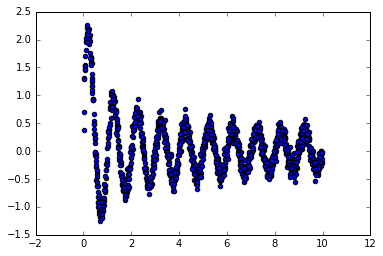

In [201]:
plt.scatter(xTrain, tTrain)
plt.show()

In [202]:
w0 = np.array([0.5 for col in range(N)])

Compute for batch method

In [233]:
w, errors = batch_gradient_descent(xTrain, tTrain, w0, 0.1, 0.01)

116.417108111
77.3830485947
55.8452037313
44.9395060719
36.6881140605
31.01705151
27.5601811224
25.7537471576
25.3599509536
23.6646292363


In [217]:
wm, errorsm = batch_gradient_descent_matrixform(xTrain, tTrain, w0, 0.1, 0.01)

99.6027452831
56.0734716271
40.5252110691
33.3620319033
29.4916062599
27.1611478046
25.6508425533
24.6192438869
23.885169459
23.344521738


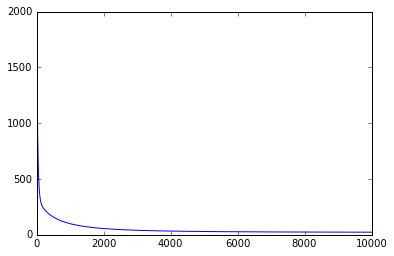

In [218]:
plt.plot(errorsm)
plt.show()

In [220]:
wm

array([[ 1.15879555],
       [ 1.96705808],
       [-2.7435133 ],
       [ 0.61988983],
       [ 1.55576116],
       [-1.232737  ],
       [-0.85092528],
       [ 1.689903  ],
       [-0.49542696],
       [-1.15047436],
       [ 1.53183524],
       [-0.6080532 ],
       [-0.71293787],
       [ 1.23508895],
       [-0.36546998],
       [-0.89051916],
       [ 1.22935005],
       [-0.35838414],
       [-0.81736841],
       [ 1.12977149],
       [-0.33430643],
       [-0.52707482],
       [ 0.75236937],
       [-0.13540071],
       [-0.83341672],
       [ 1.03085181],
       [-0.46671992],
       [-0.10758621],
       [ 0.36221107],
       [-0.37237398]])

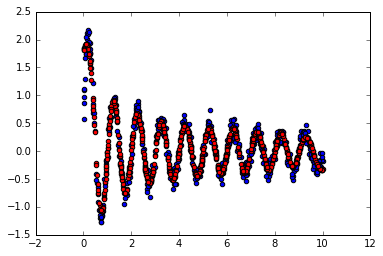

In [221]:
tPredit = []
sizeTest = len(tTest)
for i in range(sizeTest):
    tP = y_i(xTest[i], wm)
    tPredit.append(tP)
plt.scatter(xTest, tTest)
plt.scatter(xTest, tPredit, c='red')
plt.show()

SGD experiments

In [203]:
w_sgd, errors_sgd = SGD_gradient_descent(xTrain, tTrain, w0, 0.1, 0.01)

101.561520125
58.553386553
40.9066392536
35.80467711
29.84044105
29.0321476154
26.2594158833
25.1368393842
24.4770525128
24.0729813031


In [204]:
w_sgd

array([ 0.96567909,  2.14191067, -2.83123961,  0.74087491,  1.45842627,
       -1.18122726, -0.76926851,  1.68293948, -0.50748273, -1.10959281,
        1.55770791, -0.6320076 , -0.69997023,  1.20969576, -0.35339808,
       -0.86526668,  1.23260224, -0.38010256, -0.82840858,  1.15908746,
       -0.34725399, -0.50605924,  0.75800042, -0.15424125, -0.78947309,
        1.05883011, -0.55077199, -0.05206866,  0.36048618, -0.35070214])

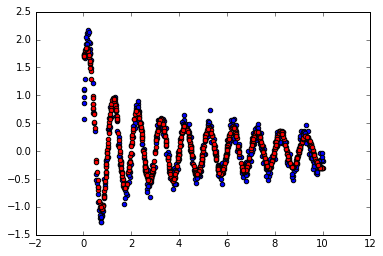

In [205]:
tPredit = []
sizeTest = len(tTest)
for i in range(sizeTest):
    tP = y_i(xTest[i], w_sgd)
    tPredit.append(tP)
plt.scatter(xTest, tTest)
plt.scatter(xTest, tPredit, c='red')
plt.show()

In [206]:
w_sgdm, errors_sgdm = SGD_gradient_descent_matrixform(xTrain, tTrain, w0, 0.1, 0.01)

108.276246844
63.787761213
41.9457993561
35.2589339058
33.3022243373
30.0405498555
27.5860060732
26.1218210413
25.0848086445
25.3503289118


In [207]:
w_sgdm

array([ 1.16061407,  1.95824554, -2.76057425,  0.61364195,  1.54739324,
       -1.18747986, -0.83867638,  1.69319244, -0.49956188, -1.12956474,
        1.54710161, -0.59258829, -0.67148051,  1.24791217, -0.35464986,
       -0.87608483,  1.2517216 , -0.35037518, -0.8215178 ,  1.17401617,
       -0.28419218, -0.50952863,  0.76627493, -0.10306613, -0.85458888,
        1.0578386 , -0.52121961, -0.09623104,  0.39711684, -0.35828186])

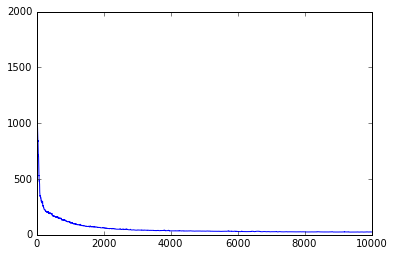

In [208]:
plt.plot(errors_sgdm)
plt.show()

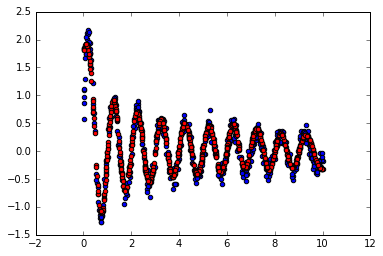

In [209]:
tPredit = []
sizeTest = len(tTest)
for i in range(sizeTest):
    tP = y_i(xTest[i], w_sgdm)
    tPredit.append(tP)
plt.scatter(xTest, tTest)
plt.scatter(xTest, tPredit, c='red')
plt.show()

## One-step solution for minimizing sum-of-square error

In [211]:
Phi = [[0 for col in range(N)] for row in range(M)]
for i in range(M):
    for j in range(N):
        Phi[i][j] = phi_j(X[i], j)

In [212]:
mPhi = np.array(Phi)
mt = np.array(t)
ww = LA.solve(np.dot( np.transpose(mPhi),mPhi), np.dot( np.transpose(mt), mPhi))

In [213]:
ww

array([ 0.17766065,  3.51200987, -4.54780737,  3.40080838, -1.53951549,
        0.77493641, -2.33731806,  2.76038058, -1.13010721, -0.76500678,
        1.24905072, -0.37843975, -0.9387156 ,  1.37707386, -0.38901769,
       -0.946772  ,  1.31747781, -0.42067067, -0.79338495,  1.13799936,
       -0.40720122, -0.40596253,  0.56264915,  0.05997088, -1.06156292,
        1.3699775 , -0.98005127,  0.2993943 ,  0.25954425, -0.3357229 ])

In [215]:
w_sgd

array([ 0.96567909,  2.14191067, -2.83123961,  0.74087491,  1.45842627,
       -1.18122726, -0.76926851,  1.68293948, -0.50748273, -1.10959281,
        1.55770791, -0.6320076 , -0.69997023,  1.20969576, -0.35339808,
       -0.86526668,  1.23260224, -0.38010256, -0.82840858,  1.15908746,
       -0.34725399, -0.50605924,  0.75800042, -0.15424125, -0.78947309,
        1.05883011, -0.55077199, -0.05206866,  0.36048618, -0.35070214])

In [214]:
tw = np.array(w_sgd)
tw-ww

array([ 0.78801844, -1.3700992 ,  1.71656776, -2.65993347,  2.99794176,
       -1.95616366,  1.56804954, -1.07744109,  0.62262449, -0.34458602,
        0.30865718, -0.25356785,  0.23874537, -0.1673781 ,  0.0356196 ,
        0.08150533, -0.08487557,  0.04056811, -0.03502363,  0.0210881 ,
        0.05994723, -0.10009672,  0.19535126, -0.21421213,  0.27208983,
       -0.31114739,  0.42927928, -0.35146296,  0.10094193, -0.01497924])

From the result we can see two w got from different method are quite different on some entries but nearly the same on some entries. I believe this indicates the importance of the basis functions. 

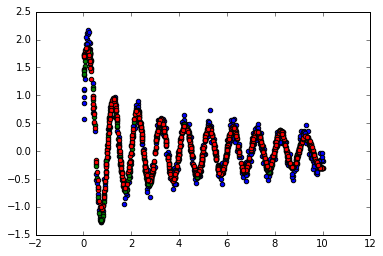

In [216]:
tPredit = []
sizeTest = len(tTest)
for i in range(sizeTest):
    tP = y_i(xTest[i], ww)
    tPredit.append(tP)
plt.scatter(xTest, tTest)
plt.scatter(xTest, tPredit, c='green')

tPredit1 = []
sizeTest = len(tTest)
for i in range(sizeTest):
    tP = y_i(xTest[i], tw)
    tPredit1.append(tP)
plt.scatter(xTest, tPredit1, c='red')

plt.show()

The result is similar to the result obtained in (1). 

## Neural Network for Regression
Use MLPRegressor in sklearn

In [314]:
M_Train = len(tTrain)
tPhi = [[0 for col in range(N)] for row in range(M_Train)]
for i in range(M_Train):
    for j in range(N):
        tPhi[i][j] = phi(xTrain[i], j)
        
mtPhi = np.array(tPhi)
mtt = np.array(tTrain)

In [316]:
clf = MLPRegressor(alpha=0.001,hidden_layer_sizes=500,max_iter=1000) 
clf.fit( mtPhi, mtt) 
print clf.score( mtPhi, mtt) 
#print clf.score( np.transpose(mPhi), np.array(tTest))

0.857331446324


In [320]:
# validate
M_Test = len(tTest)
TPhi = [[0 for col in range(N)] for row in range(M_Test)]
for i in range(M_Test):
    for j in range(N):
        TPhi[i][j] = phi(xTest[i], j)
        
mTPhi = np.array(TPhi)
mTt = np.array(tTest)
print clf.score( mTPhi, mTt)

0.836835495818


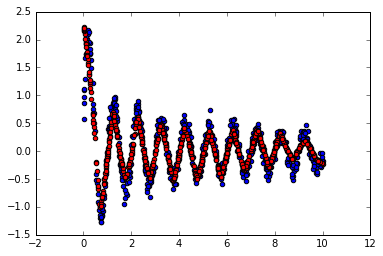

In [322]:
plt.scatter(xTest, tTest)
plt.scatter(xTest, clf.predict(mTPhi), c='red')
plt.show()

From the above cross-validated result and plot, we can see that neural network outperformed the previous predictors. 

## Apply neural network on a non-linear regression problem

In [170]:
X=[]
lX = []
t = []
text = open('Reg_Train.txt', 'r')
lines = text.readlines()
for line in lines:
    listOfLine = line.split(' ')
    lX = []
    for i in range(18):
        lX.append(float(listOfLine[i]))
    X.append(lX)
    t.append(float(listOfLine[-1]))

In [172]:
mX = np.array(X)
mt = np.array(t)

In [175]:
clf = MLPRegressor() 
clf.fit( mX, mt) 
print clf.score( mX, mt) 

0.835571631332


/Users/luy0a/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


From the result, it's accurate. （悪くない

In [171]:
X_t = []
lX_t = []
t_t = []
text_t = open('Reg_Test.txt', 'r')
lines_t = text_t.readlines()
for line in lines_t:
    listOfLine = line.split(' ')
    lX_t = []
    for i in range(18):
        lX_t.append(float(listOfLine[i]))
    X_t.append(lX_t)
    t_t.append(float(listOfLine[-1]))

In [173]:
mX_t = np.array(X_t)
mt_t = np.array(t_t)

In [185]:
print clf.score( mX_t, mt_t)

0.71770174492


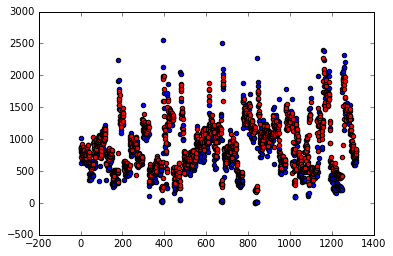

In [184]:
plt.scatter(np.arange(np.shape(mt_t)[0]), mt_t)
plt.scatter(np.arange(np.shape(mt_t)[0]), clf.predict(mX_t), c='red')
plt.show()